# Iris Sample Notebook

# About this notebook

This notebook uses the datalab structured data package for building and running a Tensorflow classification model locally. This notebook uses the classic <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris flower data set.</a>

# Setting things up

Let's look at the versions of TensorFlow and the structured data package we have. Make sure TF and SD are 1.0.0

In [5]:
import mltoolbox.classification.dnn as sd

In [6]:
import tensorflow as tf
from tensorflow.python.lib.io import file_io
import google.datalab.ml as ml
import datalab
import json
import os
print('tf ' + str(tf.__version__))
print('sd ' + str(sd.__version__))

tf 1.0.0
sd 1.0.0


This notebook will write files during preprocessing, training, and prediction into a folder called 'iris_notebook_workspace'. Edit the next cell if you want to write files to a different location.

In [7]:
# Edit LOCAL_ROOT if you want to save files to a different location.
# otherwise don't change anything is this cell. If the folder
# already exists, it will be deleted.
LOCAL_ROOT = './iris_notebook_workspace'

# No need to edit anything else in this cell.
LOCAL_PREPROCESSING_DIR = os.path.join(LOCAL_ROOT, 'preprocessing')
LOCAL_TRAINING_DIR = os.path.join(LOCAL_ROOT, 'training')
LOCAL_BATCH_PREDICTION_DIR = os.path.join(LOCAL_ROOT, 'batch_prediction')

LOCAL_TRAIN_FILE = os.path.join(LOCAL_ROOT, 'train.csv')
LOCAL_EVAL_FILE = os.path.join(LOCAL_ROOT, 'eval.csv')
LOCAL_PREDICT_FILE = os.path.join(LOCAL_ROOT, 'predict.csv')

LOCAL_SCHEMA_FILE = os.path.join(LOCAL_ROOT, 'schema.json')
LOCAL_FEATURES_FILE = os.path.join(LOCAL_ROOT, 'features.json')

if file_io.file_exists(LOCAL_ROOT):
  file_io.delete_recursively(LOCAL_ROOT)  
  
file_io.recursive_create_dir(LOCAL_ROOT)

The iris dataset is small, so the data is embedded into this notebook. Write the iris data set into 3 files: training, eval, prediction. Note that the prediction dataset does not have target values. 

In [8]:
%writefile {LOCAL_TRAIN_FILE}
Iris-setosa,4,4.6,3.1,1.5,0.2
Iris-setosa,20,5.1,3.8,1.5,0.3
Iris-setosa,43,4.4,3.2,1.3,0.2
Iris-versicolor,88,6.3,2.3,4.4,1.3
Iris-versicolor,76,6.6,3,4.4,1.4
Iris-versicolor,63,6,2.2,4,1
Iris-setosa,47,5.1,3.8,1.6,0.2
Iris-virginica,146,6.7,3,5.2,2.3
Iris-versicolor,53,6.9,3.1,4.9,1.5
Iris-versicolor,71,5.9,3.2,4.8,1.8
Iris-virginica,144,6.8,3.2,5.9,2.3
Iris-virginica,124,6.3,2.7,4.9,1.8
Iris-virginica,122,5.6,2.8,4.9,2
Iris-setosa,17,5.4,3.9,1.3,0.4
Iris-setosa,7,4.6,3.4,1.4,0.3
Iris-versicolor,87,6.7,3.1,4.7,1.5
Iris-virginica,131,7.4,2.8,6.1,1.9
Iris-setosa,2,4.9,3,1.4,0.2
Iris-virginica,147,6.3,2.5,5,1.9
Iris-setosa,29,5.2,3.4,1.4,0.2
Iris-versicolor,91,5.5,2.6,4.4,1.2
Iris-virginica,110,7.2,3.6,6.1,2.5
Iris-virginica,121,6.9,3.2,5.7,2.3
Iris-setosa,45,5.1,3.8,1.9,0.4
Iris-setosa,10,4.9,3.1,1.5,0.1
Iris-setosa,36,5,3.2,1.2,0.2
Iris-virginica,112,6.4,2.7,5.3,1.9
Iris-setosa,46,4.8,3,1.4,0.3
Iris-virginica,132,7.9,3.8,6.4,2
Iris-versicolor,77,6.8,2.8,4.8,1.4
Iris-setosa,6,5.4,3.9,1.7,0.4
Iris-versicolor,90,5.5,2.5,4,1.3
Iris-virginica,137,6.3,3.4,5.6,2.4
Iris-setosa,31,4.8,3.1,1.6,0.2
Iris-virginica,120,6,2.2,5,1.5
Iris-virginica,138,6.4,3.1,5.5,1.8
Iris-setosa,24,5.1,3.3,1.7,0.5
Iris-versicolor,96,5.7,3,4.2,1.2
Iris-versicolor,68,5.8,2.7,4.1,1
Iris-virginica,150,5.9,3,5.1,1.8
Iris-setosa,26,5,3,1.6,0.2
Iris-versicolor,98,6.2,2.9,4.3,1.3
Iris-versicolor,80,5.7,2.6,3.5,1
Iris-versicolor,72,6.1,2.8,4,1.3
Iris-versicolor,75,6.4,2.9,4.3,1.3
Iris-setosa,38,4.9,3.1,1.5,0.1
Iris-setosa,35,4.9,3.1,1.5,0.1
Iris-versicolor,89,5.6,3,4.1,1.3
Iris-versicolor,84,6,2.7,5.1,1.6
Iris-versicolor,51,7,3.2,4.7,1.4
Iris-virginica,116,6.4,3.2,5.3,2.3
Iris-versicolor,54,5.5,2.3,4,1.3
Iris-virginica,130,7.2,3,5.8,1.6
Iris-virginica,115,5.8,2.8,5.1,2.4
Iris-setosa,32,5.4,3.4,1.5,0.4
Iris-virginica,104,6.3,2.9,5.6,1.8
Iris-versicolor,64,6.1,2.9,4.7,1.4
Iris-setosa,18,5.1,3.5,1.4,0.3
Iris-versicolor,66,6.7,3.1,4.4,1.4
Iris-setosa,15,5.8,4,1.2,0.2
Iris-versicolor,52,6.4,3.2,4.5,1.5
Iris-virginica,103,7.1,3,5.9,2.1
Iris-setosa,9,4.4,2.9,1.4,0.2
Iris-versicolor,83,5.8,2.7,3.9,1.2
Iris-virginica,135,6.1,2.6,5.6,1.4
Iris-virginica,139,6,3,4.8,1.8
Iris-versicolor,85,5.4,3,4.5,1.5
Iris-virginica,106,7.6,3,6.6,2.1
Iris-setosa,27,5,3.4,1.6,0.4
Iris-virginica,140,6.9,3.1,5.4,2.1
Iris-versicolor,67,5.6,3,4.5,1.5
Iris-setosa,12,4.8,3.4,1.6,0.2
Iris-versicolor,56,5.7,2.8,4.5,1.3
Iris-virginica,113,6.8,3,5.5,2.1
Iris-versicolor,62,5.9,3,4.2,1.5
Iris-virginica,145,6.7,3.3,5.7,2.5
Iris-virginica,111,6.5,3.2,5.1,2
Iris-virginica,141,6.7,3.1,5.6,2.4
Iris-setosa,34,5.5,4.2,1.4,0.2
Iris-versicolor,81,5.5,2.4,3.8,1.1
Iris-setosa,8,5,3.4,1.5,0.2
Iris-virginica,129,6.4,2.8,5.6,2.1
Iris-versicolor,57,6.3,3.3,4.7,1.6
Iris-virginica,128,6.1,3,4.9,1.8
Iris-virginica,119,7.7,2.6,6.9,2.3
Iris-virginica,126,7.2,3.2,6,1.8
Iris-versicolor,58,4.9,2.4,3.3,1
Iris-virginica,117,6.5,3,5.5,1.8
Iris-virginica,127,6.2,2.8,4.8,1.8
Iris-setosa,16,5.7,4.4,1.5,0.4
Iris-setosa,3,4.7,3.2,1.3,0.2
Iris-virginica,108,7.3,2.9,6.3,1.8
Iris-virginica,118,7.7,3.8,6.7,2.2
Iris-setosa,42,4.5,2.3,1.3,0.3
Iris-virginica,142,6.9,3.1,5.1,2.3
Iris-setosa,14,4.3,3,1.1,0.1
Iris-virginica,134,6.3,2.8,5.1,1.5
Iris-versicolor,94,5,2.3,3.3,1
Iris-setosa,19,5.7,3.8,1.7,0.3
Iris-virginica,133,6.4,2.8,5.6,2.2
Iris-virginica,114,5.7,2.5,5,2
Iris-versicolor,86,6,3.4,4.5,1.6
Iris-versicolor,93,5.8,2.6,4,1.2
Iris-versicolor,92,6.1,3,4.6,1.4
Iris-virginica,109,6.7,2.5,5.8,1.8
Iris-virginica,102,5.8,2.7,5.1,1.9
Iris-setosa,41,5,3.5,1.3,0.3
Iris-versicolor,60,5.2,2.7,3.9,1.4
Iris-virginica,105,6.5,3,5.8,2.2
Iris-versicolor,65,5.6,2.9,3.6,1.3
Iris-setosa,28,5.2,3.5,1.5,0.2
Iris-versicolor,82,5.5,2.4,3.7,1
Iris-setosa,25,4.8,3.4,1.9,0.2
Iris-versicolor,79,6,2.9,4.5,1.5
Iris-setosa,1,5.1,3.5,1.4,0.2
Iris-versicolor,61,5,2,3.5,1
Iris-virginica,149,6.2,3.4,5.4,2.3
Iris-setosa,48,4.6,3.2,1.4,0.2
Iris-setosa,22,5.1,3.7,1.5,0.4
Iris-setosa,30,4.7,3.2,1.6,0.2

Writing ./iris_notebook_workspace/train.csv


In [9]:
%writefile {LOCAL_EVAL_FILE}
Iris-virginica,107,4.9,2.5,4.5,1.7
Iris-versicolor,100,5.7,2.8,4.1,1.3
Iris-versicolor,99,5.1,2.5,3,1.1
Iris-setosa,13,4.8,3,1.4,0.1
Iris-versicolor,70,5.6,2.5,3.9,1.1
Iris-setosa,11,5.4,3.7,1.5,0.2
Iris-setosa,37,5.5,3.5,1.3,0.2
Iris-versicolor,69,6.2,2.2,4.5,1.5
Iris-setosa,40,5.1,3.4,1.5,0.2
Iris-virginica,101,6.3,3.3,6,2.5
Iris-setosa,39,4.4,3,1.3,0.2
Iris-versicolor,74,6.1,2.8,4.7,1.2
Iris-versicolor,97,5.7,2.9,4.2,1.3
Iris-setosa,50,5,3.3,1.4,0.2
Iris-versicolor,95,5.6,2.7,4.2,1.3
Iris-setosa,44,5,3.5,1.6,0.6
Iris-virginica,123,7.7,2.8,6.7,2
Iris-setosa,23,4.6,3.6,1,0.2
Iris-versicolor,59,6.6,2.9,4.6,1.3
Iris-virginica,148,6.5,3,5.2,2
Iris-versicolor,55,6.5,2.8,4.6,1.5
Iris-setosa,49,5.3,3.7,1.5,0.2
Iris-versicolor,78,6.7,3,5,1.7
Iris-versicolor,73,6.3,2.5,4.9,1.5
Iris-virginica,136,7.7,3,6.1,2.3
Iris-setosa,33,5.2,4.1,1.5,0.1
Iris-virginica,125,6.7,3.3,5.7,2.1
Iris-virginica,143,5.8,2.7,5.1,1.9
Iris-setosa,21,5.4,3.4,1.7,0.2
Iris-setosa,5,5,3.6,1.4,0.2

Writing ./iris_notebook_workspace/eval.csv


In [10]:
%writefile {LOCAL_PREDICT_FILE}
107,4.9,2.5,4.5,1.7
100,5.7,2.8,4.1,1.3
99,5.1,2.5,3,1.1
13,4.8,3,1.4,0.1
70,5.6,2.5,3.9,1.1
11,5.4,3.7,1.5,0.2
37,5.5,3.5,1.3,0.2
69,6.2,2.2,4.5,1.5
40,5.1,3.4,1.5,0.2
101,6.3,3.3,6,2.5
39,4.4,3,1.3,0.2
74,6.1,2.8,4.7,1.2
97,5.7,2.9,4.2,1.3
50,5,3.3,1.4,0.2
95,5.6,2.7,4.2,1.3
44,5,3.5,1.6,0.6
123,7.7,2.8,6.7,2
23,4.6,3.6,1,0.2
59,6.6,2.9,4.6,1.3
148,6.5,3,5.2,2
55,6.5,2.8,4.6,1.5
49,5.3,3.7,1.5,0.2
78,6.7,3,5,1.7
73,6.3,2.5,4.9,1.5
136,7.7,3,6.1,2.3
33,5.2,4.1,1.5,0.1
125,6.7,3.3,5.7,2.1
143,5.8,2.7,5.1,1.9
21,5.4,3.4,1.7,0.2
5,5,3.6,1.4,0.2

Writing ./iris_notebook_workspace/predict.csv


# Local preprocessing starting from csv files

A schema file is used to describe each column of the csv files. It is assumed that the train, eval, and prediction csv files all have the same schema, but the prediction file has a missing target column. The format of the  schema file is a valid BigQuery table schema file. This allows BigQuery to be used later in cloud preprocessing. Only 3 BigQuery types are supported: STRING (for categorical columns) and INTEGER and FLOAT (for numerical columns).

In [11]:
schema = [
    {
        "name": "flower",
        "type": "STRING"
    },
    {
        "name": "key",
        "type": "INTEGER"
    },
    {
        "name": "sepal_length",
        "type": "FLOAT"
    },
    {
        "name": "sepal_width",
        "type": "FLOAT"
    },
    {
        "name": "petal_length",
        "type": "FLOAT"
    },
    {
        "name": "petal_width",
        "type": "FLOAT"
    }   
]

file_io.write_string_to_file(
  LOCAL_SCHEMA_FILE,
  json.dumps(schema, indent=2))

In [12]:
!rm -fr {LOCAL_PREPROCESSING_DIR}

In [13]:
train_csv = ml.CsvDataSet(
  file_pattern=LOCAL_TRAIN_FILE,
  schema=schema)
eval_csv = ml.CsvDataSet(
  file_pattern=LOCAL_EVAL_FILE,
  schema=schema)

In [14]:
sd.analyze(
  dataset=train_csv,
  output_dir=LOCAL_PREPROCESSING_DIR,
)

Analyze: completed


The output of analyze is a stats file that contains analysis from the numerical columns, and a vocab file from each categorical column. The files preoduced by analyze are consumed in training, and you should not have to worry about these files. Just for fun, lets look at them.

In [15]:
!ls  {LOCAL_PREPROCESSING_DIR}

schema.json  stats.json  vocab_flower.csv


In [16]:
!cat {LOCAL_PREPROCESSING_DIR}/numerical_analysis.json

cat: ./iris_notebook_workspace/preprocessing/numerical_analysis.json: No such file or directory


In [17]:
!cat {LOCAL_PREPROCESSING_DIR}/schema.json

[{"type": "STRING", "name": "flower"}, {"type": "INTEGER", "name": "key"}, {"type": "FLOAT", "name": "sepal_length"}, {"type": "FLOAT", "name": "sepal_width"}, {"type": "FLOAT", "name": "petal_length"}, {"type": "FLOAT", "name": "petal_width"}]

In [18]:
!cat {LOCAL_PREPROCESSING_DIR}/vocab_flower.csv

Iris-virginica
Iris-setosa
Iris-versicolor

# Local Training

The files in the output folder of analyze are consumed by the trainer. Training requires a features file to describe what transforms to apply on the data. The key and target transform are the only required transform, a default transform will be applied to every other column if it is not listed in the features dict.

In [19]:
features = {
  "sepal_length": {"transform": "scale"},
  "sepal_width": {"transform": "scale"},
  "key": {"transform": "key"},
  "flower": {"transform": "target"}
 }

# Write the features to a file.
file_io.write_string_to_file(
  LOCAL_FEATURES_FILE,
  json.dumps(features, indent=2)
)

In [20]:
!rm -fr {LOCAL_TRAINING_DIR}

In [21]:
sd.train(
  train_dataset=train_csv,
  eval_dataset=eval_csv,
  features=features,
  analysis_dir=LOCAL_PREPROCESSING_DIR,
  output_dir=LOCAL_TRAINING_DIR,
  top_n=3,
  layer_sizes=[10, 10],
  max_steps=1000,
)

INFO:tensorflow:loss = 1.23186, step = 1
INFO:tensorflow:Saving dict for global step 1: accuracy = 0.25, auc = 0.454102, global_step = 1, loss = 0.617701
INFO:tensorflow:global_step/sec: 66.1453
INFO:tensorflow:loss = 0.204407, step = 101
INFO:tensorflow:global_step/sec: 322.564
INFO:tensorflow:loss = 0.123354, step = 201
INFO:tensorflow:global_step/sec: 347.014
INFO:tensorflow:loss = 0.0609366, step = 301
INFO:tensorflow:global_step/sec: 343.332
INFO:tensorflow:loss = 0.0433275, step = 401
INFO:tensorflow:global_step/sec: 298.296
INFO:tensorflow:loss = 0.0712859, step = 501
INFO:tensorflow:global_step/sec: 280.069
INFO:tensorflow:loss = 0.0155248, step = 601
INFO:tensorflow:global_step/sec: 286.864
INFO:tensorflow:loss = 0.0187374, step = 701
INFO:tensorflow:global_step/sec: 295.654
INFO:tensorflow:loss = 0.0416045, step = 801
INFO:tensorflow:global_step/sec: 305.149
INFO:tensorflow:loss = 0.0331657, step = 901
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.4375, auc =

In [22]:
!ls {LOCAL_TRAINING_DIR}

evaluation_model  features_file.json  model  train


# Local prediction

Local predict uses the model produced by training. The input data can be a csv string or Pandas DataFrame, but the schema must match the data set used for training, except the target column is missing. That is, if the training dataset had the values "id,target,value1,value2", the prediction data must be in the form "id,value1,value2".

In [23]:
sd.predict(
  cloud=False,
  training_dir=LOCAL_TRAINING_DIR,
  data=['101,6.3,3.3,6,2.5',
        '107,4.9,2.5,4.5,1.7',
        '100,5.7,2.8,4.1,1.3']
)

,key,predicted,predicted_2,predicted_3,score,score_2,score_3
0,101,Iris-virginica,Iris-versicolor,Iris-setosa,1.000000,2.029126e-08,4.776288e-11
1,107,Iris-versicolor,Iris-virginica,Iris-setosa,0.996732,3.101223e-03,1.670731e-04
2,100,Iris-versicolor,Iris-setosa,Iris-virginica,0.999811,1.443728e-04,4.453336e-05


In [24]:
import pandas as pd
sd.predict(
  cloud=False,
  training_dir=LOCAL_TRAINING_DIR,
  data=pd.DataFrame(
    [[101,6.3,3.3,6,2.5],
     [107,4.9,2.5,4.5,1.7],
     [100,5.7,2.8,4.1,1.3]])
)

,key,predicted,predicted_2,predicted_3,score,score_2,score_3
0,101,Iris-virginica,Iris-versicolor,Iris-setosa,1.000000,2.029126e-08,4.776288e-11
1,107,Iris-versicolor,Iris-virginica,Iris-setosa,0.996732,3.101223e-03,1.670731e-04
2,100,Iris-versicolor,Iris-setosa,Iris-virginica,0.999811,1.443728e-04,4.453336e-05


# Local batch prediction

Local batch prediction runs prediction on batched input data. This is ideal if the input dataset is very large, or you have limited available main memory. However, for very large datasets, it is better to run batch prediction using the Google Cloud Machine Learning Engine services. Two output formats are supported: csv and json. The output may also be sharded. Another feature of batch prediction is the option to run evaluation--prediction on data that contains the target column. Like local_predict, the input data must match the schema used for training.

In [25]:
!rm -fr {LOCAL_BATCH_PREDICTION_DIR}

In [26]:
sd.batch_predict(
  cloud=False,
  training_dir=LOCAL_TRAINING_DIR,
  prediction_input_file=LOCAL_PREDICT_FILE,
  output_dir=LOCAL_BATCH_PREDICTION_DIR,
  output_format='json',
  mode='prediction'
)

Batch predict: completed


In [27]:
!ls {LOCAL_BATCH_PREDICTION_DIR}

errors-00000-of-00001.txt  predictions-00000-of-00001.json


In [28]:
!cat {LOCAL_BATCH_PREDICTION_DIR}/errors*

In [29]:
!head {LOCAL_BATCH_PREDICTION_DIR}/predictions-00000*

{"score_2": 0.0031012261752039194,"score_3": 0.00016707323084119707,"score": 0.9967317581176758,"predicted": "Iris-versicolor","key": 107,"predicted_2": "Iris-virginica","predicted_3": "Iris-setosa"}
{"score_2": 0.00014437302888836712,"score_3": 4.453336077858694e-05,"score": 0.9998111128807068,"predicted": "Iris-versicolor","key": 100,"predicted_2": "Iris-setosa","predicted_3": "Iris-virginica"}
{"score_2": 0.004885215777903795,"score_3": 4.0064892914415395e-07,"score": 0.9951143264770508,"predicted": "Iris-versicolor","key": 99,"predicted_2": "Iris-setosa","predicted_3": "Iris-virginica"}
{"score_2": 5.6493943702662364e-05,"score_3": 3.0510346853140913e-12,"score": 0.9999434947967529,"predicted": "Iris-setosa","key": 13,"predicted_2": "Iris-versicolor","predicted_3": "Iris-virginica"}
{"score_2": 0.00014277904119808227,"score_3": 1.0256539098918438e-05,"score": 0.9998469352722168,"predicted": "Iris-versicolor","key": 70,"predicted_2": "Iris-setosa","predicted_3": "Iris-virginica"}
{"

In [30]:
!rm -fr {LOCAL_BATCH_PREDICTION_DIR}

In [31]:
sd.batch_predict(
  cloud=False,
  training_dir=LOCAL_TRAINING_DIR,
  prediction_input_file=LOCAL_EVAL_FILE,
  output_dir=LOCAL_BATCH_PREDICTION_DIR,
  output_format='csv',
  mode='evaluation',
)

Batch predict: completed


In [32]:
!ls {LOCAL_BATCH_PREDICTION_DIR}

csv_schema.json  errors-00000-of-00001.txt  predictions-00000-of-00001.csv


In [33]:
!head {LOCAL_BATCH_PREDICTION_DIR}/predictions*

107,Iris-versicolor,Iris-virginica,Iris-setosa,0.996731758118,0.0031012261752,0.000167073230841,Iris-virginica
100,Iris-versicolor,Iris-setosa,Iris-virginica,0.999811112881,0.000144373028888,4.45333607786e-05,Iris-versicolor
99,Iris-versicolor,Iris-setosa,Iris-virginica,0.995114326477,0.0048852157779,4.00648929144e-07,Iris-versicolor
13,Iris-setosa,Iris-versicolor,Iris-virginica,0.999943494797,5.64939437027e-05,3.05103468531e-12,Iris-setosa
70,Iris-versicolor,Iris-setosa,Iris-virginica,0.999846935272,0.000142779041198,1.02565390989e-05,Iris-versicolor
11,Iris-setosa,Iris-versicolor,Iris-virginica,0.999996423721,3.61743673238e-06,8.95923553445e-14,Iris-setosa
37,Iris-setosa,Iris-versicolor,Iris-virginica,0.999986767769,1.31727174448e-05,8.08491023695e-13,Iris-setosa
69,Iris-virginica,Iris-versicolor,Iris-setosa,0.670069515705,0.329897761345,3.27791385644e-05,Iris-versicolor
40,Iris-setosa,Iris-versicolor,Iris-virginica,0.999987721443,1.23040872495e-05,4.56367257352e-13,Iris-setosa
101,I

In [34]:
!cat  {LOCAL_BATCH_PREDICTION_DIR}/csv*

[
  {
    "type": "INTEGER", 
    "mode": "NULLABLE", 
    "name": "key"
  }, 
  {
    "type": "STRING", 
    "mode": "NULLABLE", 
    "name": "predicted"
  }, 
  {
    "type": "STRING", 
    "mode": "NULLABLE", 
    "name": "predicted_2"
  }, 
  {
    "type": "STRING", 
    "mode": "NULLABLE", 
    "name": "predicted_3"
  }, 
  {
    "type": "FLOAT", 
    "mode": "NULLABLE", 
    "name": "score"
  }, 
  {
    "type": "FLOAT", 
    "mode": "NULLABLE", 
    "name": "score_2"
  }, 
  {
    "type": "FLOAT", 
    "mode": "NULLABLE", 
    "name": "score_3"
  }, 
  {
    "type": "STRING", 
    "mode": "NULLABLE", 
    "name": "target"
  }
]


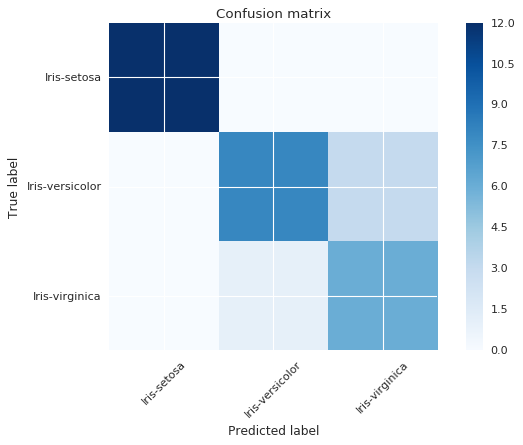

In [35]:
ml.ConfusionMatrix.from_csv(
  input_csv=os.path.join(LOCAL_BATCH_PREDICTION_DIR, 'predictions-*.csv'),
  schema_file=os.path.join(LOCAL_BATCH_PREDICTION_DIR, 'csv_schema.json')
).plot()

# Clean up

As everything was written to LOCAL_ROOT, we can simply remove this folder. If you want to delete those files, uncomment and run the next cell.

In [36]:
#!rm -fr {LOCAL_ROOT}